# 1. Install and Import Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 tf_bodypix opencv-python tfjs_graph_converter matplotlib

In [1]:
import tensorflow as tf
from tf_bodypix.api import download_model, load_model, BodyPixModelPaths
import cv2
from matplotlib import pyplot as plt
import numpy as np

# 2. Detections

In [2]:
load_model(download_model(BodyPixModelPaths.MOBILENET_FLOAT_50_STRIDE_16))

In [3]:
bodypix_model = load_model(download_model(BodyPixModelPaths.MOBILENET_FLOAT_50_STRIDE_16))

In [27]:
# get vid cap device
cap = cv2.VideoCapture(0) 

# loop through frame
while cap.isOpened(): 
    ret, frame = cap.read()
    
    # BodyPix Detections
    result = bodypix_model.predict_single(frame)
    mask = result.get_mask(threshold=0.5).numpy().astype(np.uint8)
    masked_image = cv2.bitwise_and(frame, frame, mask=mask)
    
    # Show result to user on desktop
    cv2.imshow('BodyPix', masked_image)
    
    # Break loop outcome 
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release() # Releases webcam or capture device
cv2.destroyAllWindows() # Closes imshow frames

# 3. Add Virtual Background

In [12]:
img = cv2.imread('beach.jpg')
img = img[:480, :640, :]

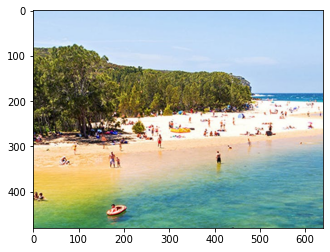

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [14]:
img.shape

(480, 640, 3)

In [15]:
frame.shape

(480, 640, 3)

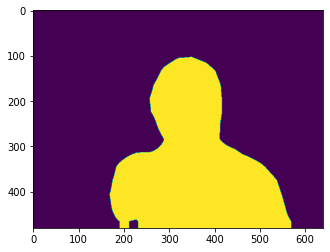

In [24]:
plt.imshow(mask)

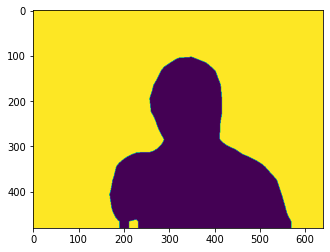

In [23]:
plt.imshow(np.where(np.add(mask, -1) == -1, 1, np.add(mask, -1)))

In [ ]:
# get vid cap device
cap = cv2.VideoCapture(0) 

# loop through frame
while cap.isOpened(): 
    ret, frame = cap.read()
    
    # BodyPix Detections
    result = bodypix_model.predict_single(frame)
    mask = result.get_mask(threshold=0.5).numpy().astype(np.uint8)
    masked_image = cv2.bitwise_and(frame, frame, mask=mask)
    
    # Apply virtual background
    neg = np.add(mask, -1)
    inverse = np.where(neg==-1, 1, neg).astype(np.uint8)
    masked_background = cv2.bitwise_and(img, img, mask=inverse)
    final = cv2.add(masked_image, masked_background)
    
    # Show result to user on desktop
    cv2.imshow('BodyPix', final)
    
    # Break loop outcome 
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release() # Releases webcam or capture device
cv2.destroyAllWindows() # Closes imshow frames